In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Daniel Sullivan
#801095863
#Homework 2

dataset = pd.read_csv('diabetes.csv')

In [2]:
X = dataset.iloc[:,0:8].values
Y = dataset.iloc[:,8].values

In [3]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)

In [4]:
from sklearn.preprocessing import StandardScaler
#Scaling the data using Standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [5]:
#Problem 1


from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [6]:
Y_pred = classifier.predict(X_test)
Y_pred[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [7]:
from sklearn.metrics import confusion_matrix 

cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[79, 20],
       [18, 37]], dtype=int64)

In [8]:
from sklearn import metrics

Prob1Accuracy = metrics.accuracy_score(Y_test, Y_pred)
Prob1Precision = metrics.precision_score(Y_test, Y_pred)
Prob1Recall = metrics.recall_score(Y_test, Y_pred)

#Getting the metrics for Logistic Regression
print("Accuracy for Problem1:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision for Problem1:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall for Problem1:",metrics.recall_score(Y_test, Y_pred)) 

Accuracy for Problem1: 0.7532467532467533
Precision for Problem1: 0.6491228070175439
Recall for Problem1: 0.6727272727272727


Text(0.5, 257.44, 'Predicted label')

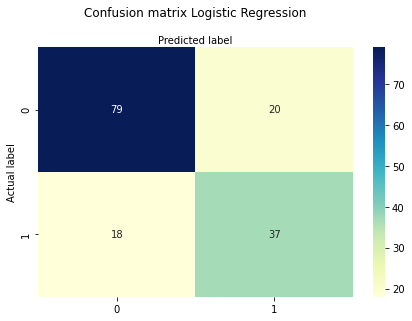

In [9]:
#Plotting the heat map for Logistic Regression
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [10]:
#Problem 2



from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train) 

GaussianNB()

In [11]:
Y2_pred  =  classifier.predict(X_test) 

In [12]:
#Getting the metrics for Gaussian Naive-Bayes
print("Accuracy for Problem2:",metrics.accuracy_score(Y_test, Y2_pred)) 
print("Precision for Problem2:",metrics.precision_score(Y_test, Y2_pred)) 
print("Recall for Problem2:",metrics.recall_score(Y_test, Y2_pred)) 

Accuracy for Problem2: 0.7662337662337663
Precision for Problem2: 0.6610169491525424
Recall for Problem2: 0.7090909090909091


In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score 
cm = confusion_matrix(Y_test, Y2_pred) 
cm

array([[79, 20],
       [16, 39]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

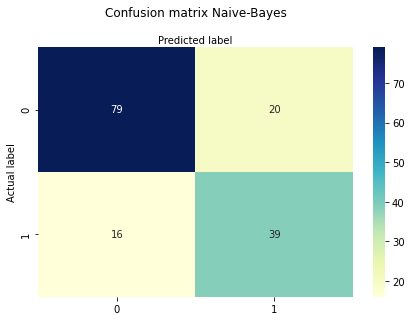

In [14]:
#Plotting the heat map for the Naive-Bayes Classifier
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix Naive-Bayes', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [15]:
#Problem 3




from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



classifier2 = LogisticRegression(class_weight = 'balanced')
validationMetrics = {'accuracy': "accuracy", "precision": "precision", "recall": "recall"}

In [16]:
cv_results = cross_validate(classifier2, X, Y, cv = 5, groups = None, scoring = validationMetrics)
cv_results

#Scores for k-fold with k=5
print("K-fold with k=5")
print('Accuracy', np.mean(cv_results['test_accuracy']))
print('Precision', np.mean(cv_results['test_precision']))
print('Recall', np.mean(cv_results['test_recall']))
print()
print()
#Comparing results with Problem 1
print("Accuracy for Problem1", Prob1Accuracy, "compared to the Accuracy for Problem3", np.mean(cv_results['test_accuracy']))
print("Precision for Problem1", Prob1Precision, "compared to the Precision for Problem3", np.mean(cv_results['test_precision']))
print("Recall for Problem1", Prob1Recall, "compared to the Recall for Problem3", np.mean(cv_results['test_recall']))

K-fold with k=5
Accuracy 0.7566080977845684
Precision 0.6345484277924214
Recall 0.7240391334730958


Accuracy for Problem1 0.7532467532467533 compared to the Accuracy for Problem3 0.7566080977845684
Precision for Problem1 0.6491228070175439 compared to the Precision for Problem3 0.6345484277924214
Recall for Problem1 0.6727272727272727 compared to the Recall for Problem3 0.7240391334730958


In [17]:
cv2_results = cross_validate(classifier2, X, Y, cv = 10, groups = None, scoring = validationMetrics)
cv2_results

#Scores for k-fold with k=10
print("K-fold with k=10")
print('Accuracy', np.mean(cv2_results['test_accuracy']))
print('Precision', np.mean(cv2_results['test_precision']))
print('Recall', np.mean(cv2_results['test_recall']))
print()
print()
#Comparing the results from Problem 1 with Problem 3
print("Accuracy for Problem1", Prob1Accuracy, "compared to the Accuracy for Problem3", np.mean(cv2_results['test_accuracy']))
print("Precision for Problem1", Prob1Precision, "compared to the Precision for Problem3", np.mean(cv2_results['test_precision']))
print("Recall for Problem1", Prob1Recall, "compared to the Recall for Problem3", np.mean(cv2_results['test_recall']))

K-fold with k=10
Accuracy 0.7526486671223513
Precision 0.6302807633751739
Recall 0.7276353276353277


Accuracy for Problem1 0.7532467532467533 compared to the Accuracy for Problem3 0.7526486671223513
Precision for Problem1 0.6491228070175439 compared to the Precision for Problem3 0.6302807633751739
Recall for Problem1 0.6727272727272727 compared to the Recall for Problem3 0.7276353276353277


In [18]:
#Problem 4
#Using K-fold cross validation on Naive-Bayes



accuracy = []
precision = []
recall = []

kf = KFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    #Splitting the Inputs
    X_train, X_test = X[train_index], X[test_index]
    #Splitting the outputs
    Y_train, Y_test = Y[train_index], Y[test_index]
    classifier = GaussianNB() 
    classifier.fit(X_train, Y_train)
    Y2_pred  =  classifier.predict(X_test) 
    #Storing the metrics to be calculated later
    accuracy.append(metrics.accuracy_score(Y_test, Y2_pred))
    precision.append(metrics.precision_score(Y_test, Y2_pred))
    recall.append(metrics.recall_score(Y_test, Y2_pred))
    
    
print("Accuracy for Problem4:",np.mean(accuracy)) 
print("Precision for Problem4:",np.mean(precision)) 
print("Recall for Problem4:",np.mean(recall)) 

Accuracy for Problem4: 0.7526610644257703
Precision for Problem4: 0.6617771412984179
Recall for Problem4: 0.6015088469035839
